# Métodos No Supervisados

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Lectura de datos

Mall Customer Data https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [2]:
df_customers = pd.read_csv("Data1/mall-customers.csv", delimiter=',')
df_customers.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,Male
1,21,15,81,Male
2,20,16,6,Female
3,23,16,77,Female
4,31,17,40,Female


In [3]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     200 non-null    int64 
 1   Annual Income (k$)      200 non-null    int64 
 2   Spending Score (1-100)  200 non-null    int64 
 3   Gender                  200 non-null    object
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [4]:
df_customers.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
mapping = {'Male': 0, 'Female':1}
df_customers["Gender"] = df_customers["Gender"].map(mapping)

In [6]:
df_customers.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [7]:
df_customers.columns = ['edad','ingreso','score','sexo']

In [8]:
df_customers.head()

,edad,ingreso,score,sexo
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [9]:
df_pca=df_customers.copy()
print(df_pca.head())
print(df_pca.shape)

   edad  ingreso  score  sexo
0    19       15     39     0
1    21       15     81     0
2    20       16      6     1
3    23       16     77     1
4    31       17     40     1
(200, 4)


In [10]:
df_pca.corr()

,edad,ingreso,score,sexo
edad,1.000000,-0.012398,-0.327227,-0.060867
ingreso,-0.012398,1.000000,0.009903,-0.056410
score,-0.327227,0.009903,1.000000,0.058109
sexo,-0.060867,-0.056410,0.058109,1.000000


In [11]:
# Estandarizar: es importante para utilizar la matriz de correlación
# si no se estandariza, se utiliza la matriz de covarianza
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_pca = scaler.fit_transform(df_pca)

In [12]:
print(df_pca.shape)
print(df_pca)

(200, 4)
[[-1.42456879 -1.73899919 -0.43480148 -1.12815215]
 [-1.28103541 -1.73899919  1.19570407 -1.12815215]
 [-1.3528021  -1.70082976 -1.71591298  0.88640526]
 [-1.13750203 -1.70082976  1.04041783  0.88640526]
 [-0.56336851 -1.66266033 -0.39597992  0.88640526]
 [-1.20926872 -1.66266033  1.00159627  0.88640526]
 [-0.27630176 -1.62449091 -1.71591298  0.88640526]
 [-1.13750203 -1.62449091  1.70038436  0.88640526]
 [ 1.80493225 -1.58632148 -1.83237767 -1.12815215]
 [-0.6351352  -1.58632148  0.84631002  0.88640526]
 [ 2.02023231 -1.58632148 -1.4053405  -1.12815215]
 [-0.27630176 -1.58632148  1.89449216  0.88640526]
 [ 1.37433211 -1.54815205 -1.36651894  0.88640526]
 [-1.06573534 -1.54815205  1.04041783  0.88640526]
 [-0.13276838 -1.54815205 -1.44416206 -1.12815215]
 [-1.20926872 -1.54815205  1.11806095 -1.12815215]
 [-0.27630176 -1.50998262 -0.59008772  0.88640526]
 [-1.3528021  -1.50998262  0.61338066 -1.12815215]
 [ 0.94373197 -1.43364376 -0.82301709 -1.12815215]
 [-0.27630176 -1.43364

## Componentes principales

In [13]:
from sklearn.decomposition import PCA

# mismo numero de componentes que variables
PCA = PCA()
componentes = PCA.fit_transform(df_pca)
PCA.components_

array([[ 0.68790025, -0.00608217, -0.68691996, -0.23430156],
       [-0.10368955,  0.7652519 ,  0.10321115, -0.62688553],
       [ 0.12238438,  0.64366712, -0.13657317,  0.74300906],
       [-0.70785859, -0.00672133, -0.70628337, -0.00740532]])

In [14]:
pd.DataFrame(PCA.components_, columns=['edad','ingreso','score','sexo'])

,edad,ingreso,score,sexo
0,0.687900,-0.006082,-0.686920,-0.234302
1,-0.103690,0.765252,0.103211,-0.626886
2,0.122384,0.643667,-0.136573,0.743009
3,-0.707859,-0.006721,-0.706283,-0.007405


 ``` PC1 = 0.687900*edad-0.006082*ingreso-0.686920*score-0.234302*sexo```<br>
 ``` PC2 =......```
 

In [15]:
cumVar = pd.DataFrame(np.cumsum(PCA.explained_variance_ratio_)*100,
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(PCA.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
     .rename(index={0:"PC1", 1: "PC2", 2: "PC3", 3: "PC4"})

,VarPerc,cumVarPerc
PC1,33.690046,33.690046
PC2,26.230645,59.920690
PC3,23.260639,83.181329
PC4,16.818671,100.000000


In [16]:
pd.DataFrame(PCA.transform(X=df_pca), columns = ['PC1', 'PC2', 'PC3', 'PC4'])

,PC1,PC2,PC3,PC4
0,-0.406383,-0.520714,-2.072527,1.335529
1,-1.427673,-0.367310,-2.277644,0.082329
2,0.050761,-1.894068,-0.367375,2.174381
3,-1.694513,-1.631908,-0.717467,0.075228
4,-0.313108,-1.810483,-0.426460,0.683070
...,...,...,...,...
195,-1.179572,1.324568,1.932441,-0.615899
196,0.672751,1.221061,2.438084,0.272925
197,-0.723719,2.765010,0.583178,-0.313022
198,0.767096,2.861930,1.150341,1.219621


In [17]:
PCA.explained_variance_ratio_

array([0.33690046, 0.26230645, 0.23260639, 0.16818671])

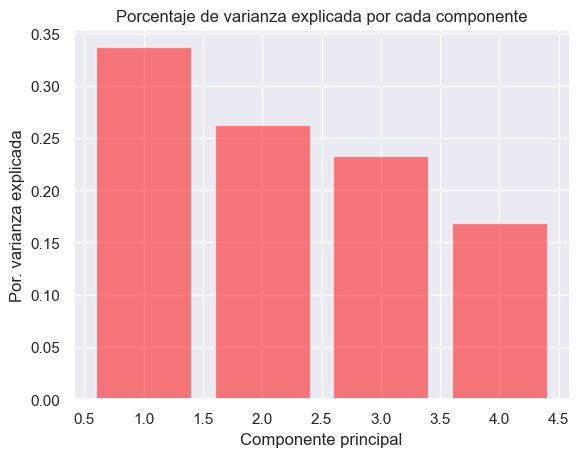

In [18]:
plt.bar(range(1,len(PCA.components_)+1),PCA.explained_variance_ratio_, alpha=.5,color='red')
plt.title("Varianza explicada y pareto")
plt.title("Porcentaje de varianza explicada por cada componente")
plt.xlabel('Componente principal')
plt.ylabel('Por. varianza explicada')
plt.show()

## Clustering Kmeans

In [19]:
df_clustering = df_customers[['edad','score']]
df_clustering.head()

,edad,score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [20]:
from sklearn.cluster import KMeans

In [21]:
model = KMeans(n_clusters = 3, random_state=0)

In [22]:
model.fit(df_clustering)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [23]:
model.predict(df_clustering)

array([1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [24]:
df_clustering["cluster"] = model.predict(df_clustering)
df_clustering.head()

C:\Users\Alexander\AppData\Local\Temp\ipykernel_27580\755923102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering["cluster"] = model.predict(df_clustering)


,edad,score,cluster
0,19,39,1
1,21,81,0
2,20,6,2
3,23,77,0
4,31,40,1


In [25]:
df_clustering['cluster'].value_counts() 

1    91
0    62
2    47
Name: cluster, dtype: int64

<Axes: xlabel='edad', ylabel='score'>

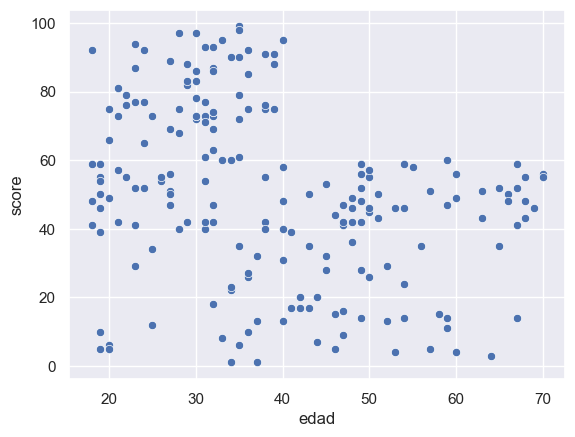

In [26]:
sns.scatterplot(data = df_clustering, x = 'edad', y ='score')

<Axes: xlabel='edad', ylabel='score'>

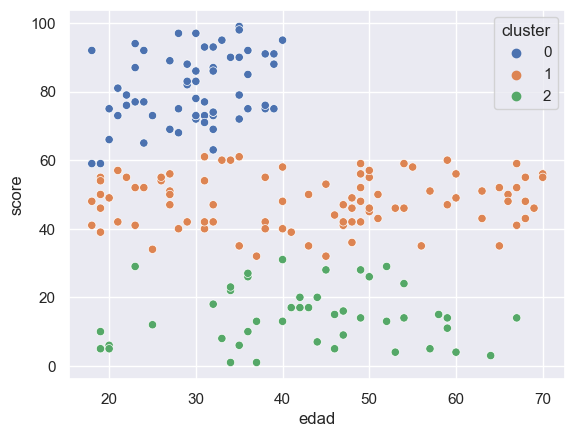

In [27]:
sns.scatterplot(data = df_clustering, x = 'edad', y ='score', hue = 'cluster', palette= 'deep')

In [28]:
model.cluster_centers_

array([[29.56451613, 80.74193548],
       [43.05494505, 47.78021978],
       [42.95744681, 14.59574468]])

In [29]:
pd.DataFrame(model.cluster_centers_, columns = ['edad', 'score'])

,edad,score
0,29.564516,80.741935
1,43.054945,47.780220
2,42.957447,14.595745


## Preprocesamiento de variables

In [30]:
df_clustering2 = df_customers[['edad','score']]

In [31]:
df_clustering2.head()

,edad,score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering2),columns = df_clustering2.columns)
df_scaled.head()

,edad,score
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


<Axes: xlabel='edad', ylabel='Count'>

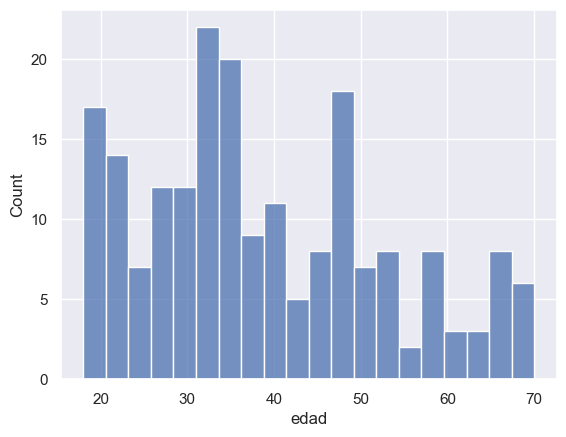

In [34]:
sns.histplot(data = df_customers, x = 'edad', bins = 20)


<Axes: xlabel='edad', ylabel='Count'>

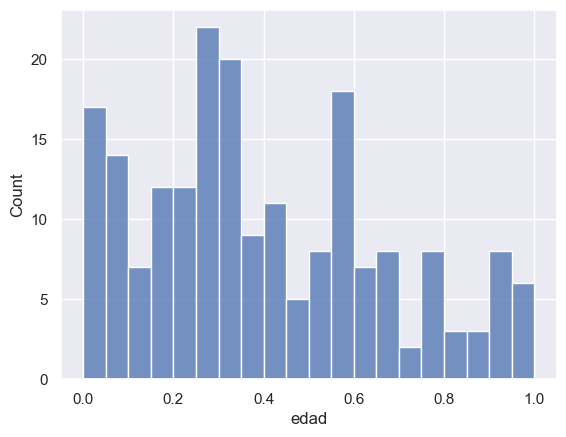

In [35]:
sns.histplot(data = df_scaled, x = 'edad', bins =20)

### Clustering con variables escaladas

In [36]:
model = KMeans(n_clusters = 3, random_state = 0)

In [37]:
model.fit(df_scaled)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [38]:
model.predict(df_scaled)

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [39]:
df_scaled["cluster"] = model.predict(df_scaled)
df_scaled.head()

,edad,score,cluster
0,0.019231,0.387755,0
1,0.057692,0.816327,2
2,0.038462,0.051020,0
3,0.096154,0.775510,2
4,0.250000,0.397959,0


<Axes: xlabel='edad', ylabel='score'>

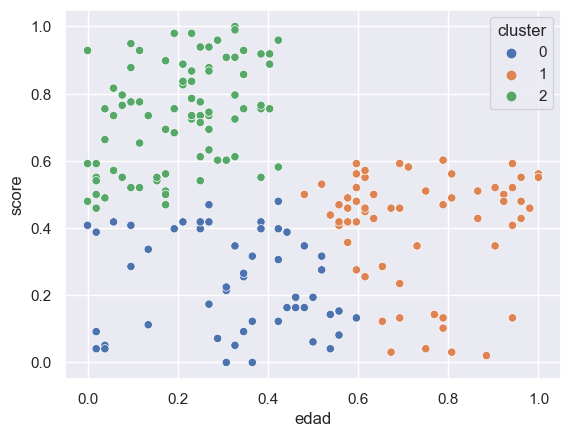

In [40]:
sns.scatterplot(data = df_scaled, x = 'edad', y = 'score', hue = 'cluster', palette = 'deep')

In [41]:
model.cluster_centers_

array([[0.32656023, 0.23912206],
       [0.7323201 , 0.40108624],
       [0.20565611, 0.73961585]])

### Descriptivos de clustering adecuado 

In [42]:
df_customers[['edad','score']].shape

(200, 2)

In [43]:
df_scaled.shape

(200, 3)

In [44]:
df_cluster = pd.concat([df_customers[['edad', 'score']], df_scaled.cluster], axis = 1)

In [45]:
df_cluster

,edad,score,cluster
0,19,39,0
1,21,81,2
2,20,6,0
3,23,77,2
4,31,40,0
...,...,...,...
195,35,79,2
196,45,28,0
197,32,74,2
198,32,18,0


In [46]:
df_cluster['cluster'].value_counts()

2    85
1    62
0    53
Name: cluster, dtype: int64

In [47]:
df_cluster.groupby('cluster').mean()

,edad,score
cluster,,
0,34.981132,24.433962
1,56.080645,40.306452
2,28.694118,73.482353


<Axes: xlabel='cluster', ylabel='edad'>

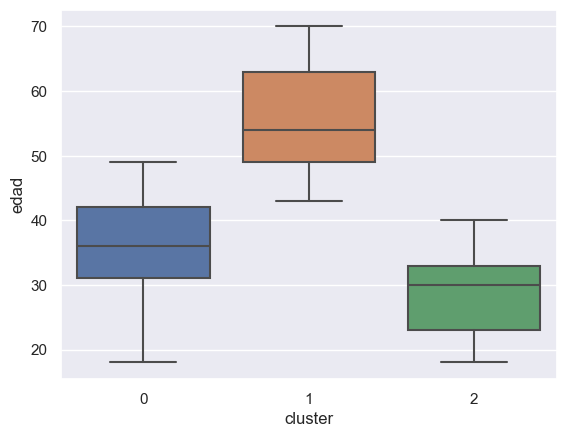

In [48]:
sns.boxplot(data = df_cluster, y = 'edad', x = 'cluster')

<Axes: xlabel='cluster', ylabel='score'>

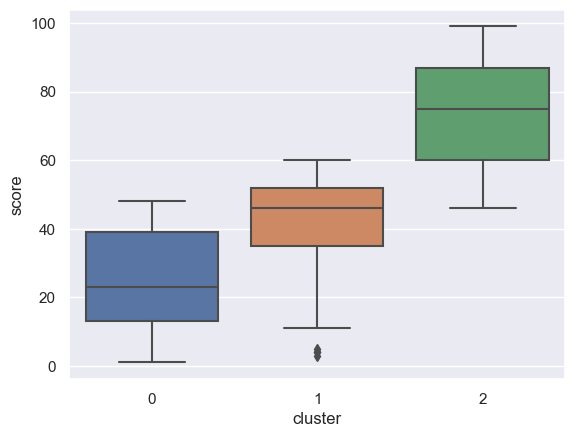

In [49]:
sns.boxplot(data = df_cluster, y = 'score', x = 'cluster')

### Clustering con más variables

In [50]:
df_customers.head()

,edad,ingreso,score,sexo
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [51]:
df_clustering = df_customers[['edad', 'ingreso', 'score','sexo']]
df_clustering.head()

,edad,ingreso,score,sexo
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [52]:
scaler = MinMaxScaler()

In [53]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns = df_clustering.columns)
df_scaled.head()

,edad,ingreso,score,sexo
0,0.019231,0.000000,0.387755,0.0
1,0.057692,0.000000,0.816327,0.0
2,0.038462,0.008197,0.051020,1.0
3,0.096154,0.008197,0.775510,1.0
4,0.250000,0.016393,0.397959,1.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn

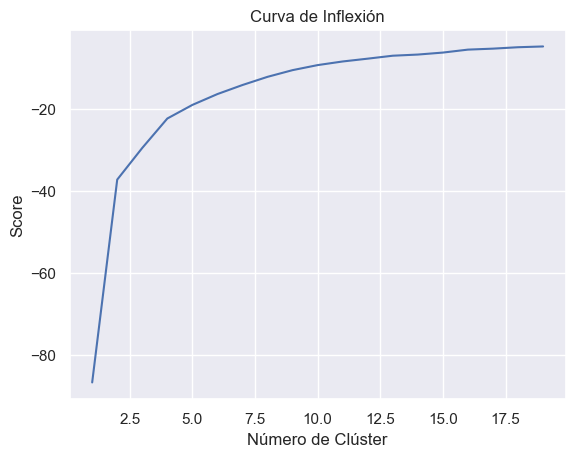

In [54]:
# Calculando el número de clúster adecuado:
numClus = range(1,20)
kmeans = [KMeans(n_clusters=i,max_iter=600, algorithm = 'auto') for i in numClus]
kmeans
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]
score
plt.plot(numClus,score)
plt.xlabel('Número de Clúster')
plt.ylabel('Score')
plt.title('Curva de Inflexión')
plt.show() 

In [55]:
from sklearn import metrics 
ctdDf = int(0.1*df_clustering.shape[0])
cluster = [kmeans[i].predict(df_scaled) for i in range(len(kmeans))]

for i in range(1,11):
    print(str(i+1)+' clústeres:')
    print('Inercia: '+str(kmeans[i].inertia_))
    print('Silueta: '+str(metrics.silhouette_score(df_scaled, cluster[i], metric='euclidean',sample_size=ctdDf)))
    print("\n")

2 clústeres:
Inercia: 37.27227241211876
Silueta: 0.5095108527491207


3 clústeres:
Inercia: 29.552857611943853
Silueta: 0.4090402056283004


4 clústeres:
Inercia: 22.39096001192855
Silueta: 0.36277123418139845


5 clústeres:
Inercia: 19.078016107573568
Silueta: 0.330899093109295


6 clústeres:
Inercia: 16.43455254808258
Silueta: 0.32000134345056896


7 clústeres:
Inercia: 14.229305695022063
Silueta: 0.3658072759965618


8 clústeres:
Inercia: 12.237931521755302
Silueta: 0.42735735582683426


9 clústeres:
Inercia: 10.606198613220782
Silueta: 0.2711267403916007


10 clústeres:
Inercia: 9.379501904107322
Silueta: 0.25860653492082186


11 clústeres:
Inercia: 8.49495837030608
Silueta: 0.4001598746152263




In [56]:
model = KMeans(n_clusters = 3)
model.fit(df_scaled)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [57]:
df_customers['cluster'] = model.predict(df_scaled)

In [58]:
df_customers.head()

,edad,ingreso,score,sexo,cluster
0,19,15,39,0,2
1,21,15,81,0,2
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [59]:
df_customers['cluster'].value_counts()

0    112
2     46
1     42
Name: cluster, dtype: int64

In [60]:
df_customers.groupby('cluster').mean()

,edad,ingreso,score,sexo
cluster,,,,
0,38.098214,59.250000,51.526786,1.0
1,52.738095,62.214286,30.642857,0.0
2,28.000000,62.239130,64.826087,0.0


<Axes: xlabel='cluster', ylabel='edad'>

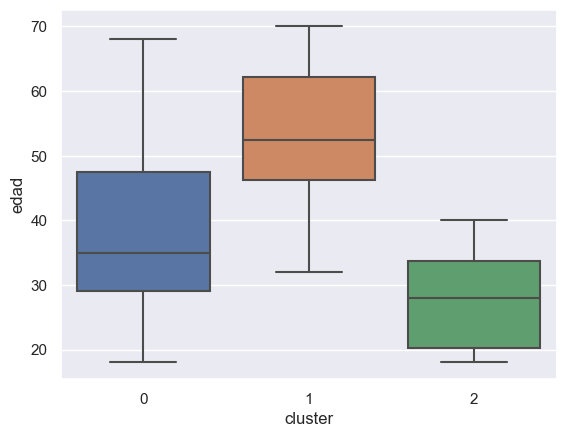

In [61]:
sns.boxplot(data = df_customers, y = 'edad', x='cluster')

<Axes: xlabel='cluster', ylabel='score'>

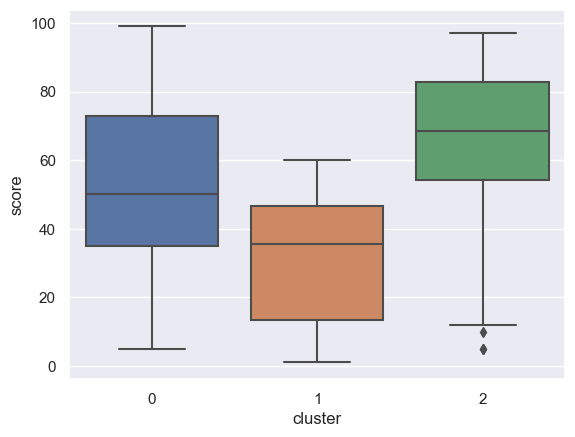

In [62]:
sns.boxplot(data = df_customers, y='score', x = 'cluster')

<Axes: xlabel='cluster', ylabel='ingreso'>

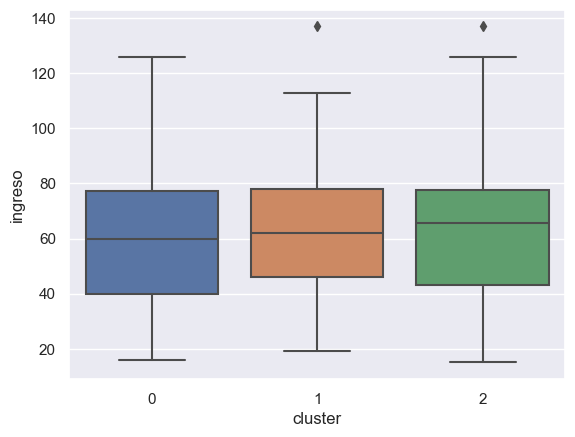

In [63]:
sns.boxplot(data = df_customers, y='ingreso', x = 'cluster')

In [64]:
pd.crosstab(df_customers.cluster, df_customers.sexo)

sexo,0,1
cluster,,
0,0,112
1,42,0
2,46,0


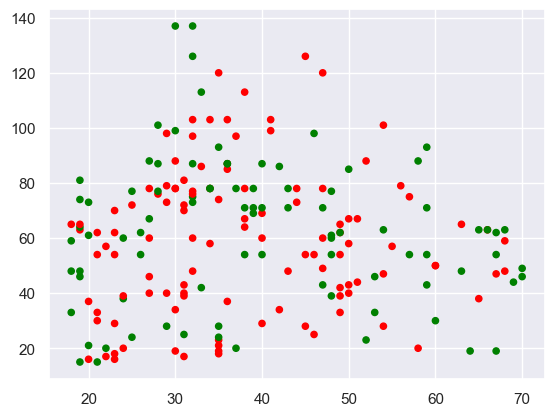

In [65]:
# Graficando segmentos
fig = plt.figure()
f1 = df_customers['edad'].values
f2 = df_customers['ingreso'].values

colores=['red','green','blue']
asignar=[]
for row in cluster[1]:
    asignar.append(colores[row])
    
plt.scatter(f1, f2, c=asignar, s=20)
plt.show()

In [66]:
# Evaluación
numClus = [3,4,5]

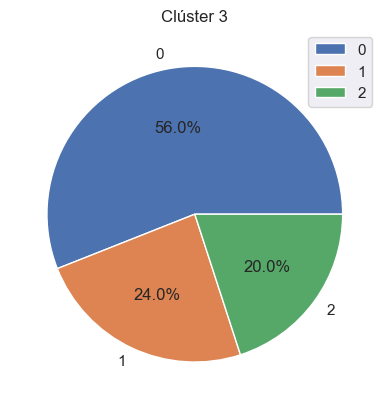

         ctdCliente  pctCliente
cluster                        
0               112        56.0
1                48        24.0
2                40        20.0




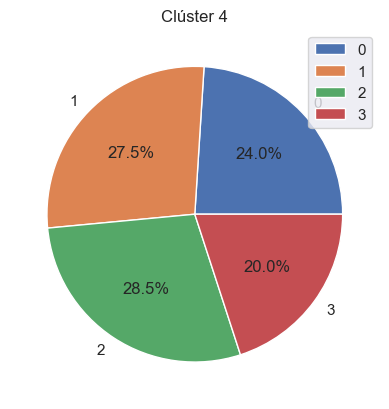

         ctdCliente  pctCliente
cluster                        
0                48        24.0
1                55        27.5
2                57        28.5
3                40        20.0




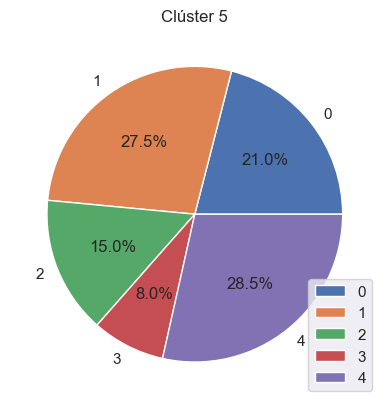

         ctdCliente  pctCliente
cluster                        
0                42        21.0
1                55        27.5
2                30        15.0
3                16         8.0
4                57        28.5




In [67]:
centroide = [kmeans[i].cluster_centers_ for i in range(len(kmeans))]
copy = pd.DataFrame()

for i in numClus:
    # Distribución de los grupos por clúster:
    copy['cluster'] = cluster[i-1]
    cantidadGrupo = pd.DataFrame()
    cantidadGrupo['ctdCliente']=copy.groupby('cluster').size()
    cantidadGrupo['pctCliente']=round(100*cantidadGrupo['ctdCliente']/cantidadGrupo['ctdCliente'].sum(),2)
    
    # gráfico de los grupos según su distribución:
    plt.pie(cantidadGrupo['pctCliente'], labels=cantidadGrupo.index, autopct='%1.1f%%')
    plt.title('Clúster '+str(i))
    plt.legend()
    plt.show()
    print(cantidadGrupo)
    print('\n')

## Clustering PAM

In [68]:
!pip install kmodes 

Defaulting to user installation because normal site-packages is not writeable


In [69]:
from kmodes.kmodes import KModes
from sklearn import preprocessing

In [70]:
dbKmodes = df_scaled.copy()

In [72]:
cost =[]
cluster = []

for i in list(range(1,9)):
    model = KModes(n_clusters=i, init='Cao', n_init=1, verbose=1)
    cluster.append(model.fit_predict(dbKmodes))
    cost.append(model.cost_)
print(model.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 657.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 564.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 549.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 538.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 530.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 526.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 514.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves:

Este gráfico nos ayudará a analizar la evolución de los valores del costo cada vez que sugiere cierto número de cluster, lo ideal es tomar aquellos costos menores.

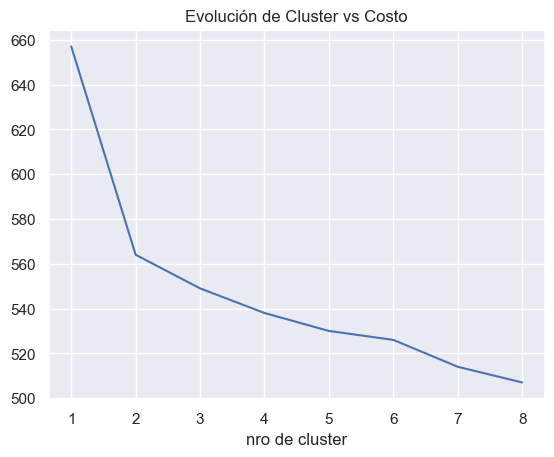

In [73]:
rango=np.array(range(1,len(cost)+1))
plt.plot(rango,cost)
plt.title('Evolución de Cluster vs Costo')
plt.xlabel('nro de cluster')
plt.show()

In [74]:
numClus=[2,3,4]

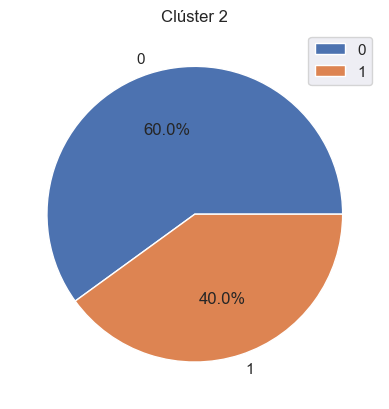

         ctdCliente  pctCliente
cluster                        
0               120        60.0
1                80        40.0




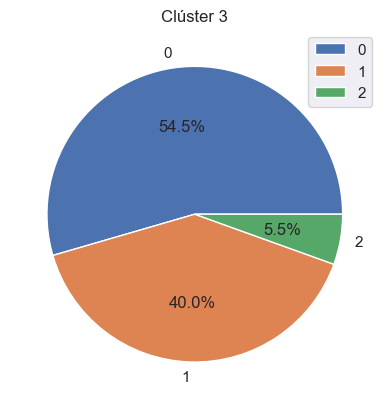

         ctdCliente  pctCliente
cluster                        
0               109        54.5
1                80        40.0
2                11         5.5




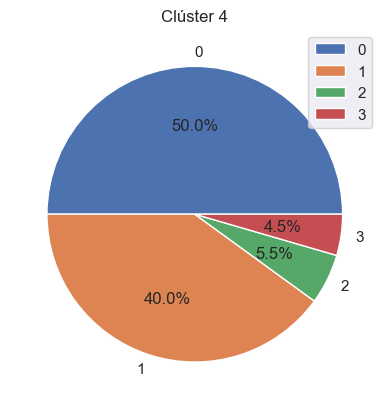

         ctdCliente  pctCliente
cluster                        
0               100        50.0
1                80        40.0
2                11         5.5
3                 9         4.5




In [79]:
copy = pd.DataFrame()
for i in numClus:
    # Dsitribución de los grupos por clúster:
    copy['cluster']=cluster[i-1]
    ctdGrupo = pd.DataFrame()
    ctdGrupo['ctdCliente']=copy.groupby('cluster').size()
    ctdGrupo['pctCliente']=np.round(100*ctdGrupo['ctdCliente']/ctdGrupo['ctdCliente'].sum(),2)
    
    #gráfico de los grupos según su distribución:
    plt.pie(ctdGrupo['pctCliente'], labels=ctdGrupo.index, autopct='%1.1f%%')
    plt.title('Clúster '+str(i))
    plt.legend()
    plt.show()
    print(ctdGrupo)
    print('\n')

## Clustering Jerarquico


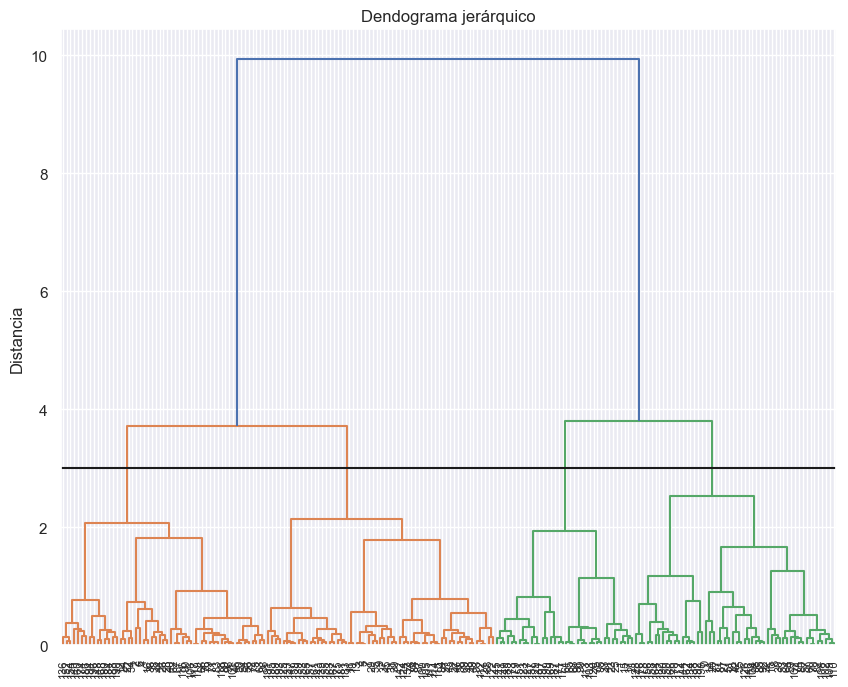

In [89]:
#Mostrando el dendograma con el numero optimo de cluster
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.cluster import AgglomerativeClustering

Z = linkage(df_scaled, 'ward')

plt.figure(figsize=(10,8))
plt.title('Dendograma jerárquico')
plt.ylabel('Distancia')
max_d = 3

dendrogram(
        Z,
        leaf_rotation=90.,
        leaf_font_size=8.,
        show_contracted=True
    )
plt.axhline(y=max_d, c='k')
plt.show()

In [90]:
clustering = AgglomerativeClustering().fit(df_scaled)

clus_je =AgglomerativeClustering(n_clusters=4)
y_clus_je = clus_je.fit_predict(df_scaled)

In [91]:
y_clus_je 

array([0, 2, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 0, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2], dtype=int64)

TAREA: replicar el scrip de no supervisado en la data